### **<u>Objective: </u>**

This notebook is intended to visualize the data in term of graphs. It is very necessary to visualize the data before hand so that future work can be completed in the correct direction. 

**Reason:**

One common issue encountered is class imbalance. When this occurs, it’s difficult to establish a reliable baseline model, as the model tends to be biased toward the majority class.

In [ ]:
## importing necessary libararies
import pandas as pd
from functions_pt2 import get_plots, val_count, drop_rows_by_values, swap_columns, encode_labeling, plot_against_target

In [ ]:
## Reading csv and printing head
df = pd.read_csv("Final.csv")
df.head()

,Unnamed: 0,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,1,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,2,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,3,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,4,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [ ]:
## Drop first column because it's a sequence
df = df.drop(df.columns[0], axis=1)
print(df.dtypes)

Gender                                    object
Age                                        int64
City                                      object
Profession                                object
Academic Pressure                          int64
Work Pressure                              int64
CGPA                                     float64
Study Satisfaction                         int64
Job Satisfaction                           int64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                 int64
dtype: object


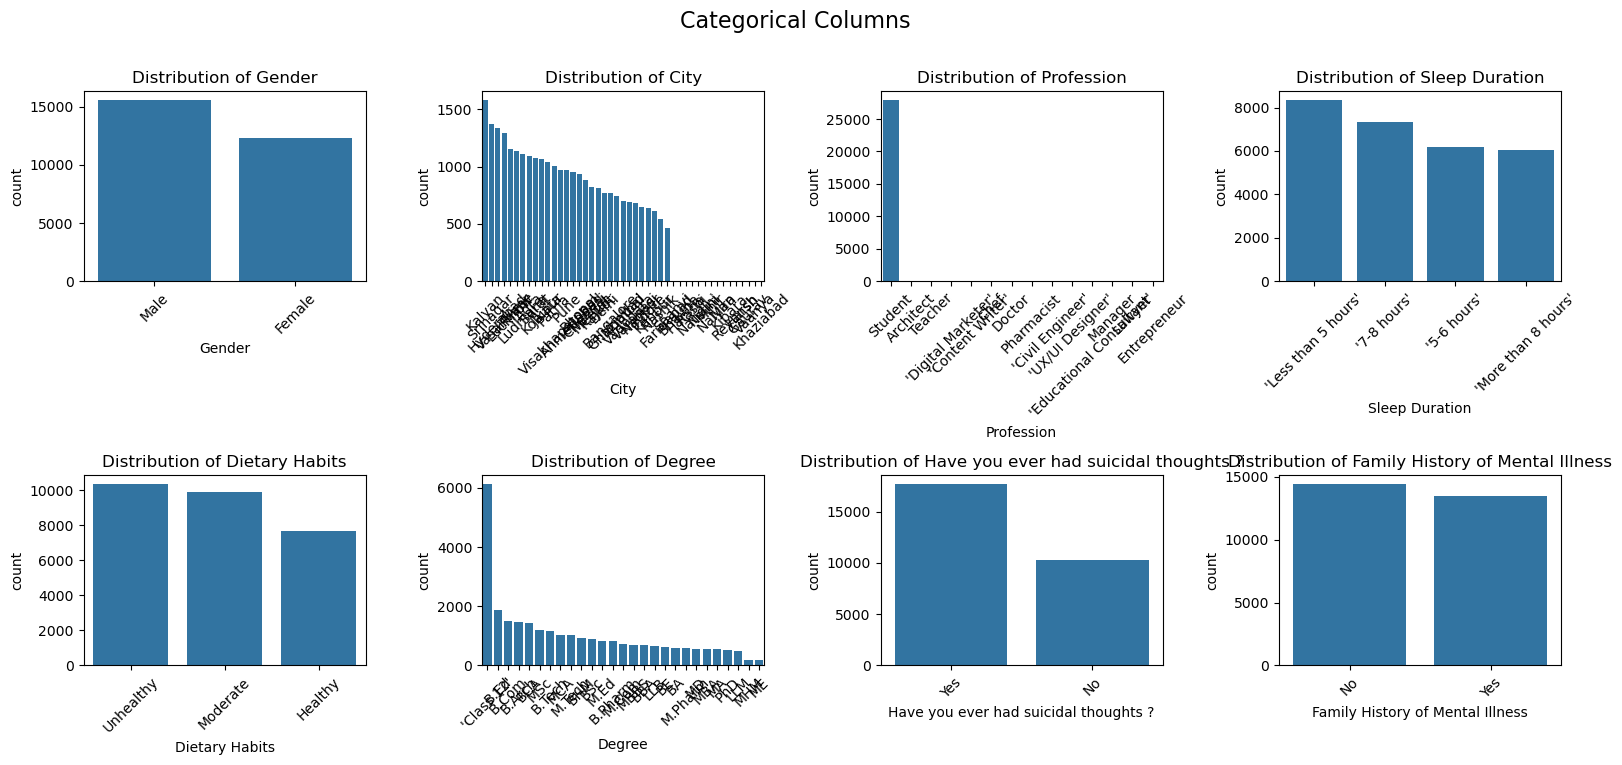

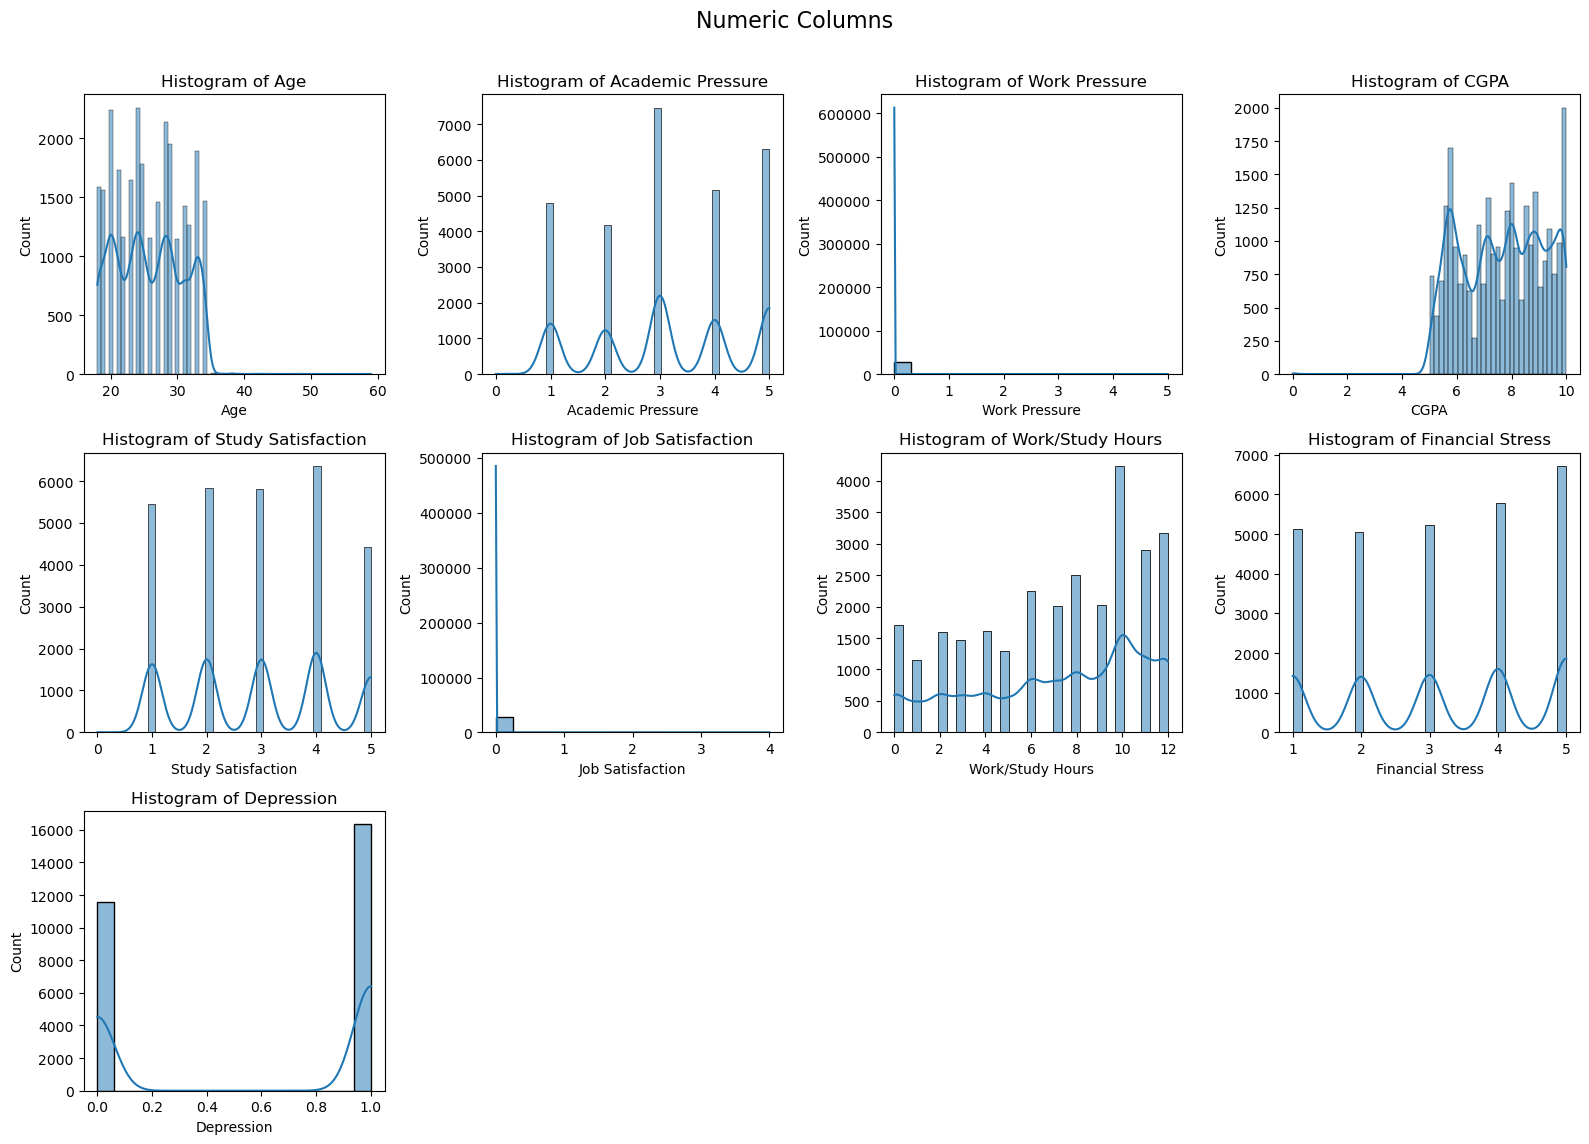

In [ ]:
## Visualizing plots of each column categorical and numerical
get_plots(df)

## **Notes:**

- We can observe that Profession column has one strong category and that is Students

In [5]:
val_count(df, 'Depression')

Depression
1    16336
0    11565
Name: count, dtype: int64


Class 1 is 58.6%
Class 0 is 41.4%

Target is not largely imbalance. But there is a small percentage of bias-ness towards Class 1.

---

We observe a lot of different values in Profession column but value Student is the highest.
We can drop if the values are not as much.

In [6]:
val_count(df, 'Profession')

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
'Content Writer'                2
Chef                            2
Doctor                          2
Pharmacist                      2
'Civil Engineer'                1
'UX/UI Designer'                1
'Educational Consultant'        1
Manager                         1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64


In [7]:
## Need to drop all rows which are not Students
df = drop_rows_by_values(df, 'Profession', ["Architect", "Teacher", "'Digital Marketer'", "'Content Writer'", "Chef", "Doctor", "Pharmacist", "'Civil Engineer'", "'UX/UI Designer'", "'Educational Consultant'", "Manager", "Lawyer", "Entrepreneur"])

In [8]:
## verifying if only value is left in the Profession column
val_count(df, 'Profession')

Profession
Student    27870
Name: count, dtype: int64


In [9]:
## Dropping since this column only has one type of value.
df.drop(columns='Profession')

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,Male,31,Srinagar,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,Female,28,Varanasi,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,Female,25,Jaipur,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27,Surat,5,0,5.75,5,0,'5-6 hours',Unhealthy,'Class 12',Yes,7,1,Yes,0
27897,Male,27,Ludhiana,2,0,9.40,3,0,'Less than 5 hours',Healthy,MSc,No,0,3,Yes,0
27898,Male,31,Faridabad,3,0,6.61,4,0,'5-6 hours',Unhealthy,MD,No,12,2,No,0
27899,Female,18,Ludhiana,5,0,6.88,2,0,'Less than 5 hours',Healthy,'Class 12',Yes,10,5,No,1


---

Consider City column, need to transform that column to state.

In [10]:
val_count(df, 'City')

City
Kalyan           1571
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1289
Lucknow          1155
Thane            1139
Ludhiana         1109
Agra             1092
Surat            1078
Kolkata          1066
Jaipur           1034
Patna            1006
Visakhapatnam     968
Pune              968
Ahmedabad         949
Bhopal            933
Chennai           884
Meerut            822
Rajkot            815
Delhi             768
Bangalore         766
Ghaziabad         744
Mumbai            698
Vadodara          693
Varanasi          685
Nagpur            651
Indore            643
Kanpur            607
Nashik            547
Faridabad         461
Saanvi              2
Bhavna              2
Harsha              2
Rashi               1
Nandini             1
Nalini              1
Mihir               1
Nalyan              1
Mira                1
Kibara              1
Reyansh             1
Harsh               1
Gaurav              1
Vaanya              1
Khaziabad           1
Name:

Found some values which are not actual city names. Need to get rid of those rows.

In [ ]:
## These are the values which are not actual city names.
## "Saanvi", "Bhavna", "Harsha", "Rashi", "Nandini", "Nalini", "Mihir", "Nalyan", "Mira", "Kibara", "Reyansh", "Harsh", "Gaurav", "Vaanya"
df = drop_rows_by_values(df, 'City', ["Saanvi", "Bhavna", "Harsha", "Rashi", "Nandini", "Nalini", "Mihir", "Nalyan", "Mira", "Kibara", "Reyansh", "Harsh", "Gaurav", "Vaanya"])

In [12]:
val_count(df, 'City')

City
Kalyan           1571
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1289
Lucknow          1155
Thane            1139
Ludhiana         1109
Agra             1092
Surat            1078
Kolkata          1066
Jaipur           1034
Patna            1006
Visakhapatnam     968
Pune              968
Ahmedabad         949
Bhopal            933
Chennai           884
Meerut            822
Rajkot            815
Delhi             768
Bangalore         766
Ghaziabad         744
Mumbai            698
Vadodara          693
Varanasi          685
Nagpur            651
Indore            643
Kanpur            607
Nashik            547
Faridabad         461
Khaziabad           1
Name: count, dtype: int64


In [ ]:
# Mapping of valid cities to their respective Indian states
## Since there are so many citites it is better to bin them in states
city_to_state = {
    'Agra': 'Uttar Pradesh',                
    'Ahmedabad': 'Gujarat',
    'Bangalore': 'Karnataka',
    'Bhopal': 'Madhya Pradesh',
    'Chennai': 'Tamil Nadu',
    'Delhi': 'Delhi',
    'Faridabad': 'Haryana',
    'Ghaziabad': 'Uttar Pradesh',
    'Hyderabad': 'Telangana',               
    'Indore': 'Madhya Pradesh',
    'Jaipur': 'Rajasthan',
    'Kalyan': 'Maharashtra',
    'Kanpur': 'Uttar Pradesh',              
    'Kolkata': 'West Bengal',
    'Lucknow': 'Uttar Pradesh',             
    'Ludhiana': 'Punjab',                   
    'Meerut': 'Uttar Pradesh',
    'Mumbai': 'Maharashtra',
    'Nagpur': 'Maharashtra',
    'Nashik': 'Maharashtra',
    'Patna': 'Bihar',
    'Pune': 'Maharashtra',
    'Rajkot': 'Gujarat',
    'Srinagar': 'Jammu and Kashmir',        
    'Surat': 'Gujarat',
    'Thane': 'Maharashtra',                 
    'Vadodara': 'Gujarat',
    'Varanasi': 'Uttar Pradesh',
    'Vasai-Virar': 'Maharashtra',           
    'Visakhapatnam': 'Andhra Pradesh',
}

## Creating a new column called State
df['State'] = df['City'].map(city_to_state)

In [14]:
## Checking if the state column now exist.
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,State
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1,Andhra Pradesh
1,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0,Karnataka
2,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0,Jammu and Kashmir
3,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1,Uttar Pradesh
4,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0,Rajasthan


In [15]:
## Making sure all the cities were mapped to the states and no unknowns are left.
val_count(df, 'State')

State
Maharashtra          6863
Uttar Pradesh        5105
Gujarat              3535
Madhya Pradesh       1576
Jammu and Kashmir    1372
Telangana            1339
Punjab               1109
West Bengal          1066
Rajasthan            1034
Bihar                1006
Andhra Pradesh        968
Tamil Nadu            884
Delhi                 768
Karnataka             766
Haryana               461
Name: count, dtype: int64


---

Making a copy of df as df_copy. 

Dropping City column in the new dataframe.

In [16]:
df_copy = df.copy(deep=True)
df_copy = df_copy.drop(columns='City')

In [17]:
## Dropping Profession column

df_copy = df_copy.drop(columns= 'Profession')

In [ ]:
## Swap columns so last one can be our target column 
df_copy = swap_columns(df_copy, 'Depression', 'State')
df_copy.head(3)

,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,State,Depression
0,Male,33,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,Andhra Pradesh,1
1,Female,24,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,Karnataka,0
2,Male,31,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,Jammu and Kashmir,0


We swapped State and Depression column.

---

Understanding Job Satisfcation column

In [19]:
val_count(df_copy, 'Job Satisfaction')

Job Satisfaction
0    27845
2        3
4        2
1        2
3        1
Name: count, dtype: int64


Looking at the column it doesn't provide us with a lot of information

In [ ]:
## Dropping all rows which are not 0. 
df_copy = drop_rows_by_values(df_copy, 'Job Satisfaction', [1, 2, 3, 4])

In [ ]:
## Confirming the rows are dropped
val_count(df_copy, 'Job Satisfaction')

Job Satisfaction
0    27845
Name: count, dtype: int64


---

Considereing column Work Pressure

In [22]:
val_count(df_copy, 'Work Pressure')

Work Pressure
0    27845
Name: count, dtype: int64


In [23]:
df_copy = drop_rows_by_values(df_copy, 'Work Pressure', [2, 5])

In [24]:
val_count(df_copy, 'Work Pressure')

Work Pressure
0    27845
Name: count, dtype: int64


Dropping both columns, job Satisfaction and Work Pressure

In [ ]:
## Dropping both the columns
df_copy = df_copy.drop(columns= 'Job Satisfaction')
df_copy = df_copy.drop(columns= 'Work Pressure')

In [ ]:
## Ensuring the columns were dropped
df_copy.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,State,Depression
0,Male,33,5,8.97,2,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,Andhra Pradesh,1
1,Female,24,2,5.90,5,'5-6 hours',Moderate,BSc,No,3,2,Yes,Karnataka,0
2,Male,31,3,7.03,5,'Less than 5 hours',Healthy,BA,No,9,1,Yes,Jammu and Kashmir,0
3,Female,28,3,5.59,2,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,Uttar Pradesh,1
4,Female,25,4,8.13,3,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,Rajasthan,0


---

Considering column Sleep Duration

In [ ]:
## Seeing how many times these values appeared
val_count(df_copy, 'Sleep Duration')

Sleep Duration
'Less than 5 hours'    8314
'7-8 hours'            7329
'5-6 hours'            6171
'More than 8 hours'    6031
Name: count, dtype: int64


In [ ]:
## Label encoding the Sleep Duration column because it has order to it.

sleep_mapping = {
    "'Less than 5 hours'": 0,
    "'5-6 hours'": 1,
    "'6-7 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'": 4
}

## Making a new column Sleep Duration_encoded
df_copy= encode_labeling(df_copy, 'Sleep Duration', sleep_mapping)


### Label Encoding scheme

The order for the column Sleep Duration

Less than 5 hours: 0,
    5-6 hours: 1,
    6-7 hours: 2,
    7-8 hours: 3,
    More than 8 hours: 4

In [ ]:
## ensuring it's there in the dataframe
df_copy.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,State,Depression,Sleep Duration_encoded
0,Male,33,5,8.97,2,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,Andhra Pradesh,1,1
1,Female,24,2,5.90,5,'5-6 hours',Moderate,BSc,No,3,2,Yes,Karnataka,0,1
2,Male,31,3,7.03,5,'Less than 5 hours',Healthy,BA,No,9,1,Yes,Jammu and Kashmir,0,0
3,Female,28,3,5.59,2,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,Uttar Pradesh,1,3
4,Female,25,4,8.13,3,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,Rajasthan,0,1


In [ ]:
## Counting and ensuring there are no values other than that.
val_count(df_copy, 'Sleep Duration_encoded')

Sleep Duration_encoded
0    8314
3    7329
1    6171
4    6031
Name: count, dtype: int64


In [ ]:
## dropping Sleep Duration column
df_copy = df_copy.drop(columns= 'Sleep Duration')

In [34]:
df_copy.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,State,Depression,Sleep Duration_encoded
0,Male,33,5,8.97,2,Healthy,B.Pharm,Yes,3,1,No,Andhra Pradesh,1,1
1,Female,24,2,5.90,5,Moderate,BSc,No,3,2,Yes,Karnataka,0,1
2,Male,31,3,7.03,5,Healthy,BA,No,9,1,Yes,Jammu and Kashmir,0,0
3,Female,28,3,5.59,2,Moderate,BCA,Yes,4,5,Yes,Uttar Pradesh,1,3
4,Female,25,4,8.13,3,Moderate,M.Tech,Yes,1,1,No,Rajasthan,0,1


In [ ]:
## Swapping the last column and confirming Depression.
df_copy = swap_columns(df_copy, 'Depression', 'Sleep Duration_encoded')
df_copy.head(2)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,State,Sleep Duration_encoded,Depression
0,Male,33,5,8.97,2,Healthy,B.Pharm,Yes,3,1,No,Andhra Pradesh,1,1
1,Female,24,2,5.90,5,Moderate,BSc,No,3,2,Yes,Karnataka,1,0


---

Considering Dietary Habits.

In [ ]:
## Checking the num of counts
val_count(df_copy, 'Dietary Habits')

Dietary Habits
Unhealthy    10310
Moderate      9900
Healthy       7635
Name: count, dtype: int64


### Label Encoding Scheme for Dietary Habits

Dietary Habit encoded
"Unhealthy": 0,
    "Moderate": 1,
    "Healthy": 2


In [37]:
diet_mapping = {
    "Unhealthy": 0,
    "Moderate": 1,
    "Healthy": 2
}
df_copy= encode_labeling(df_copy, 'Dietary Habits', diet_mapping)

In [ ]:
## Verifying if the dataframe is updated
df_copy.head(2)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,State,Sleep Duration_encoded,Depression,Dietary Habits_encoded
0,Male,33,5,8.97,2,Healthy,B.Pharm,Yes,3,1,No,Andhra Pradesh,1,1,2
1,Female,24,2,5.90,5,Moderate,BSc,No,3,2,Yes,Karnataka,1,0,1


---

In [ ]:
## swap last column
df_copy = swap_columns(df_copy, 'Depression', 'Dietary Habits_encoded')

In [ ]:
## dropping Dietary Habit after label encoding
df_copy = df_copy.drop(columns= 'Dietary Habits')

---

In [ ]:
## Ensuring the dataframe is having correct columns
df_copy.head(2)


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,State,Sleep Duration_encoded,Dietary Habits_encoded,Depression
0,Male,33,5,8.97,2,B.Pharm,Yes,3,1,No,Andhra Pradesh,1,2,1
1,Female,24,2,5.90,5,BSc,No,3,2,Yes,Karnataka,1,1,0


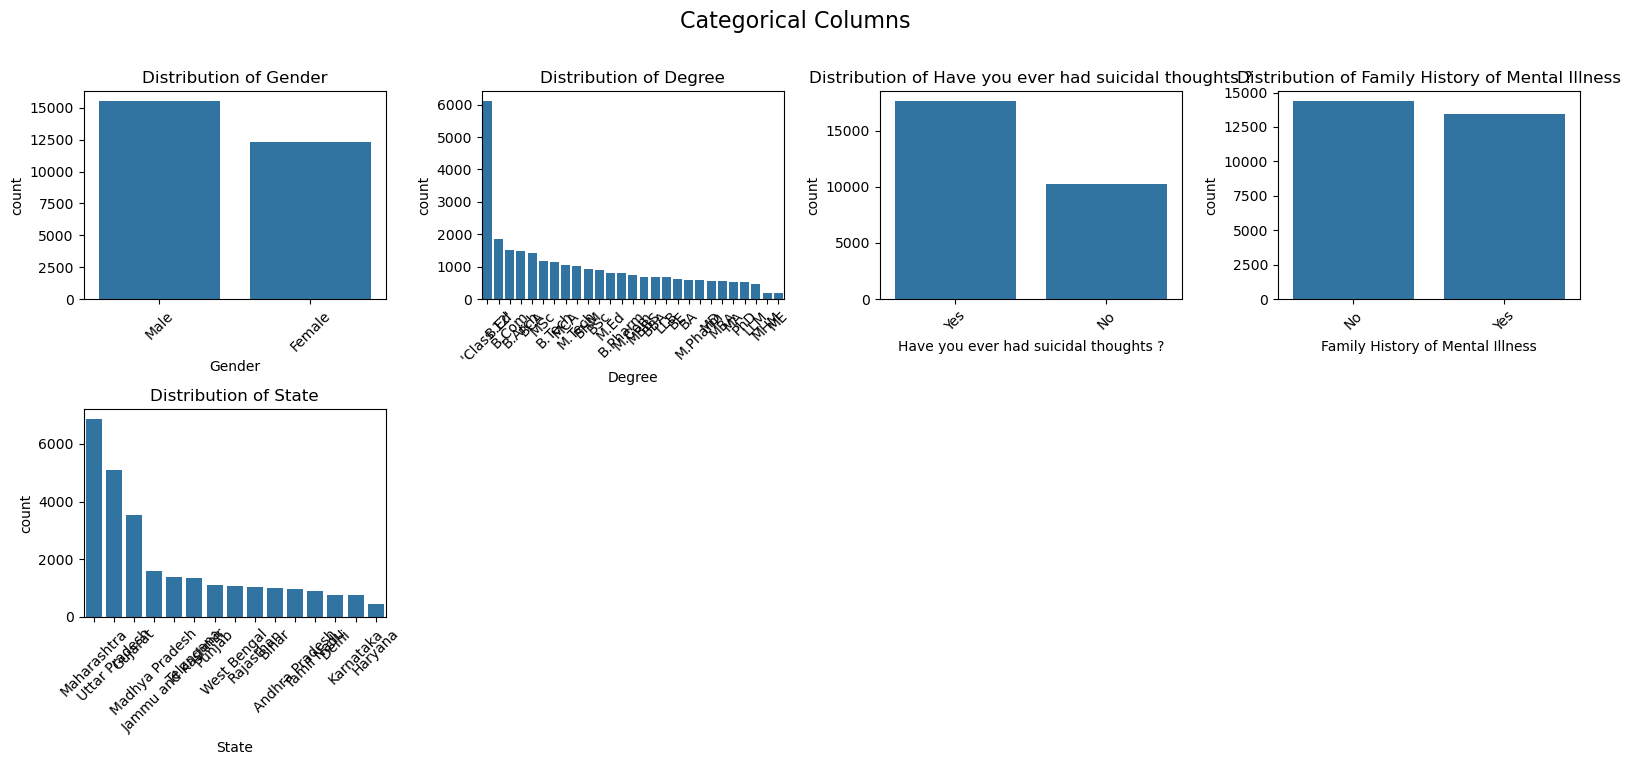

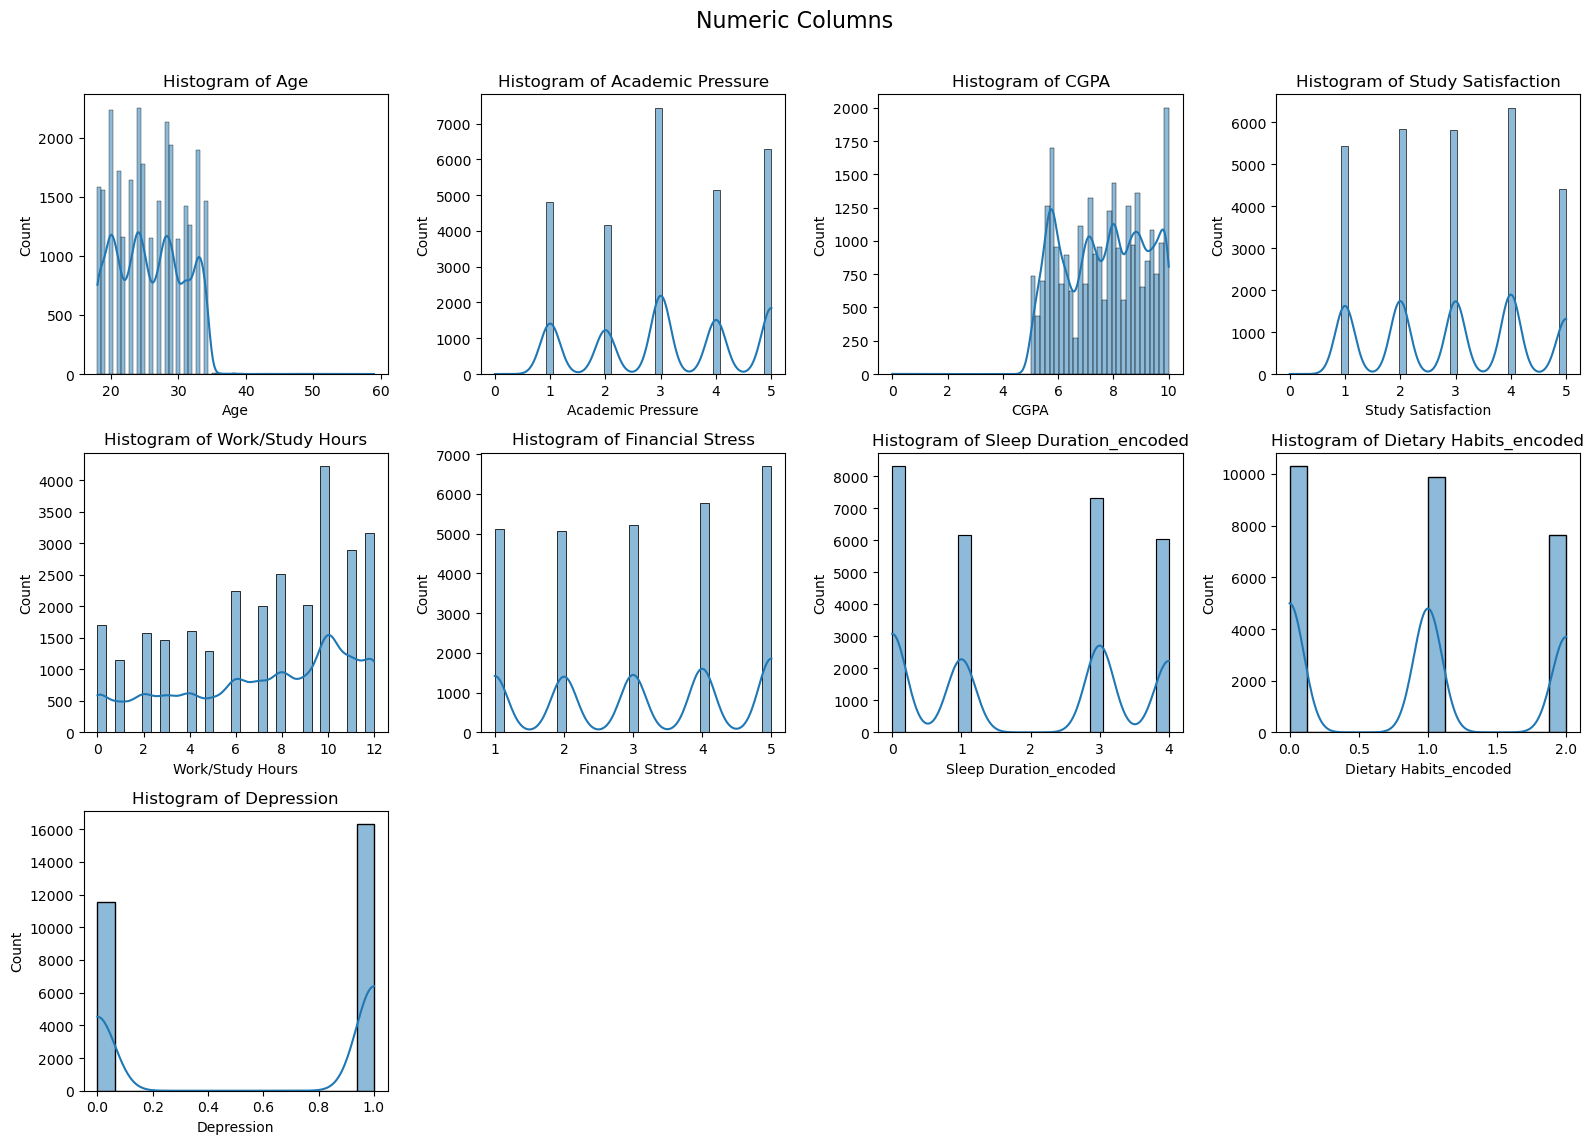

In [ ]:
## Plotting Categorical and Numerical columns
get_plots(df_copy)

In [ ]:
## Ensuring the data types of the dataframe
print(df_copy.dtypes)

Gender                                    object
Age                                        int64
Academic Pressure                          int64
CGPA                                     float64
Study Satisfaction                         int64
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                           int64
Family History of Mental Illness          object
State                                     object
Sleep Duration_encoded                     int64
Dietary Habits_encoded                     int64
Depression                                 int64
dtype: object


In [44]:
df_copy.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,State,Sleep Duration_encoded,Dietary Habits_encoded,Depression
0,Male,33,5,8.97,2,B.Pharm,Yes,3,1,No,Andhra Pradesh,1,2,1
1,Female,24,2,5.90,5,BSc,No,3,2,Yes,Karnataka,1,1,0
2,Male,31,3,7.03,5,BA,No,9,1,Yes,Jammu and Kashmir,0,2,0
3,Female,28,3,5.59,2,BCA,Yes,4,5,Yes,Uttar Pradesh,3,1,1
4,Female,25,4,8.13,3,M.Tech,Yes,1,1,No,Rajasthan,1,1,0


In [46]:
df_copy.shape

(27845, 14)

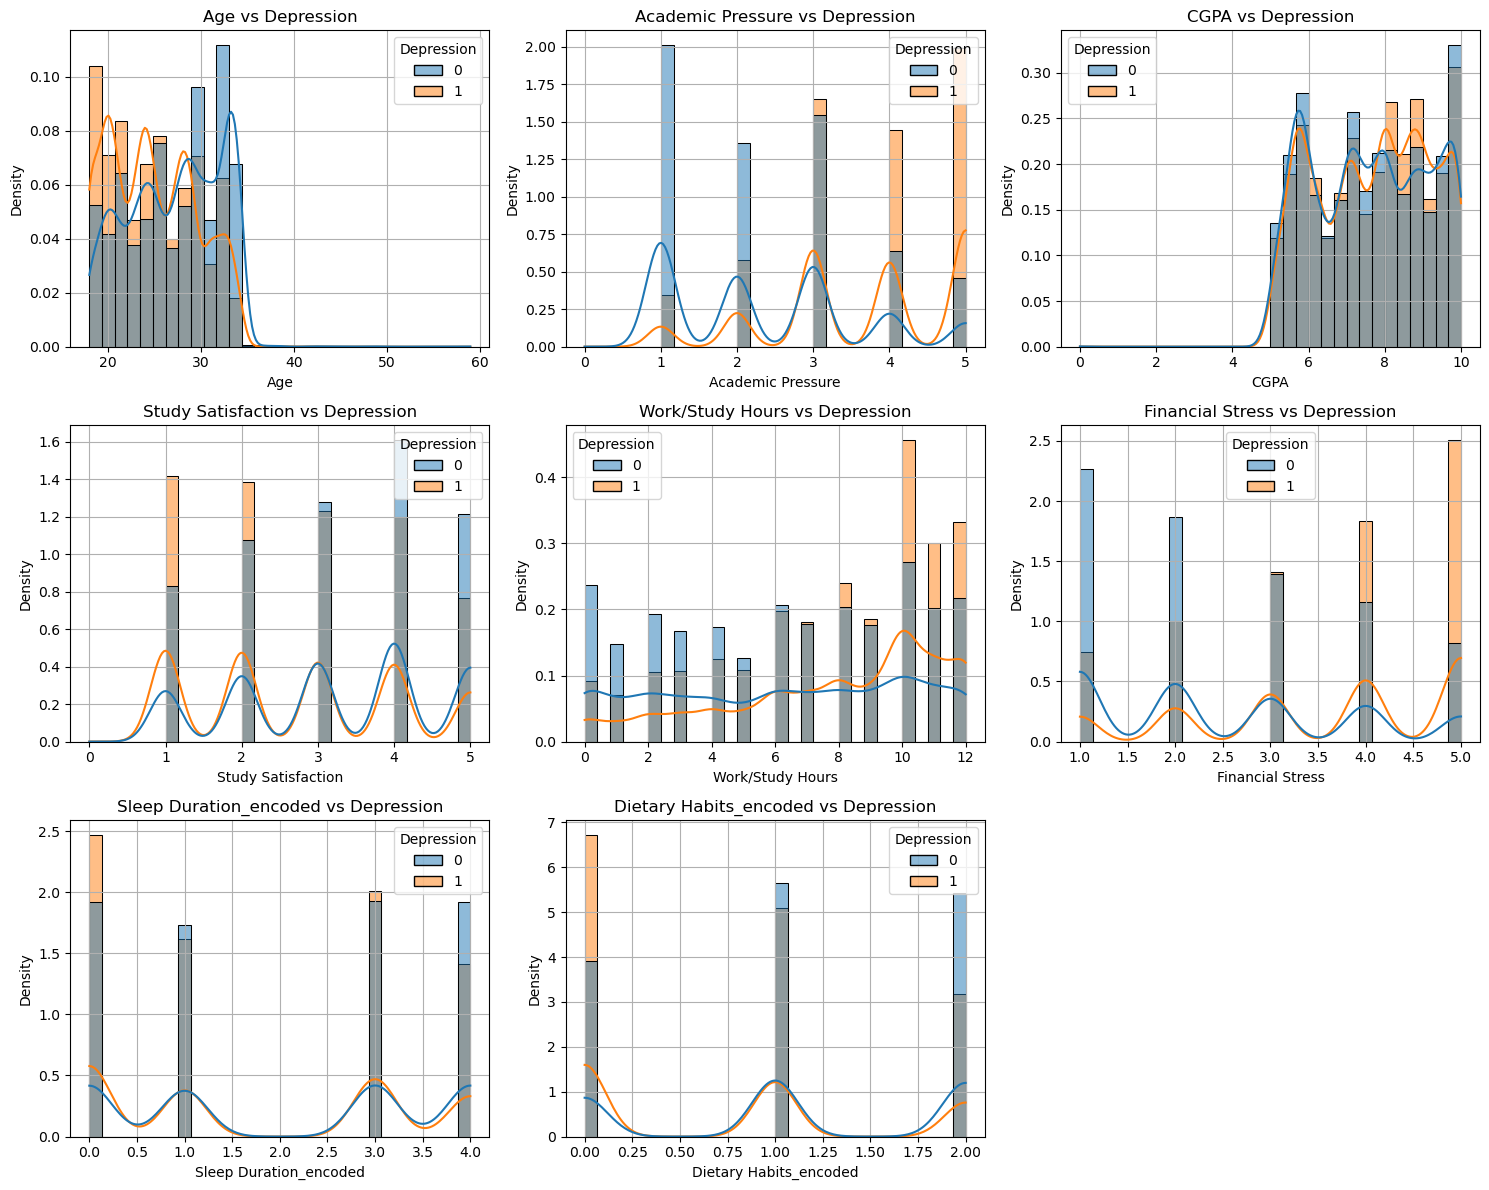

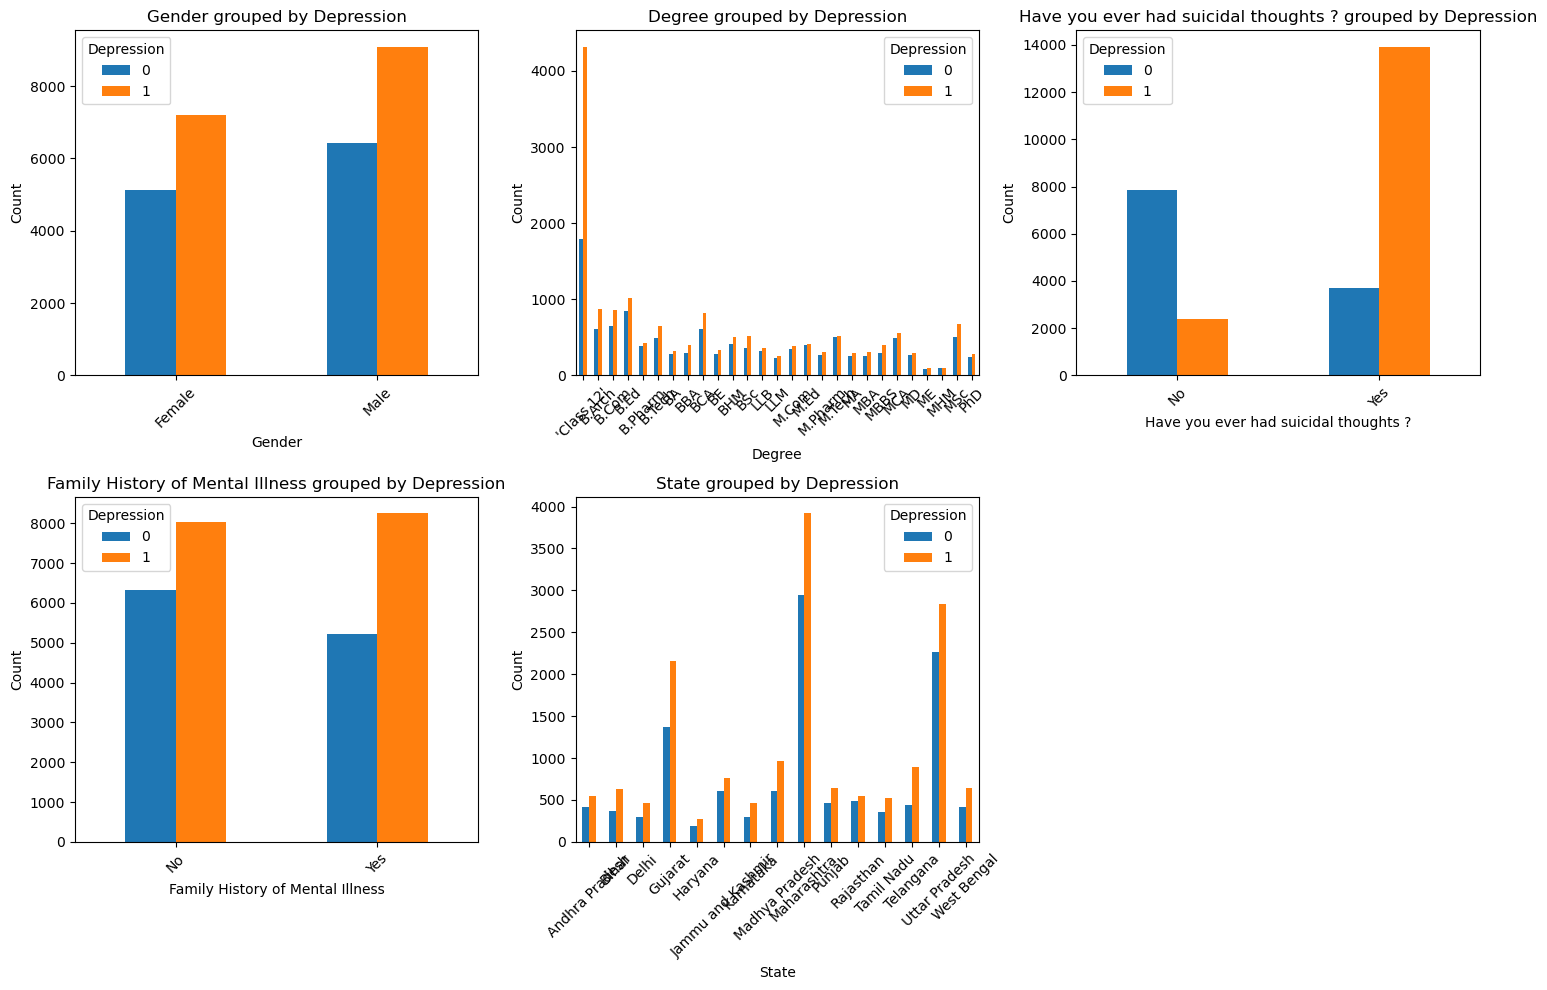

In [ ]:
## Plotting Categorical column and numerical ccolumns against Target columns to see the distribution

plot_against_target(df_copy, 'Depression')

In [ ]:
## Obtaining the csv file for modeling 
##df_copy.to_csv("FileModel.csv", index=False)